<a href="https://colab.research.google.com/github/umbertocheriota/Python/blob/master/Homework_PySpark_Nizamov_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Установка PySpark

In [1]:
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:13 https://developer.download.nvidia.com/com

In [2]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [3]:
!wget -q www-us.apache.org/dist/spark/spark-2.4.6/spark-2.4.6-bin-hadoop2.7.tgz

In [4]:
!tar -xvf spark-2.4.6-bin-hadoop2.7.tgz

spark-2.4.6-bin-hadoop2.7/
spark-2.4.6-bin-hadoop2.7/bin/
spark-2.4.6-bin-hadoop2.7/bin/pyspark.cmd
spark-2.4.6-bin-hadoop2.7/bin/spark-submit
spark-2.4.6-bin-hadoop2.7/bin/spark-submit.cmd
spark-2.4.6-bin-hadoop2.7/bin/spark-class2.cmd
spark-2.4.6-bin-hadoop2.7/bin/spark-shell2.cmd
spark-2.4.6-bin-hadoop2.7/bin/pyspark2.cmd
spark-2.4.6-bin-hadoop2.7/bin/docker-image-tool.sh
spark-2.4.6-bin-hadoop2.7/bin/run-example.cmd
spark-2.4.6-bin-hadoop2.7/bin/spark-submit2.cmd
spark-2.4.6-bin-hadoop2.7/bin/beeline.cmd
spark-2.4.6-bin-hadoop2.7/bin/beeline
spark-2.4.6-bin-hadoop2.7/bin/spark-shell
spark-2.4.6-bin-hadoop2.7/bin/find-spark-home
spark-2.4.6-bin-hadoop2.7/bin/sparkR2.cmd
spark-2.4.6-bin-hadoop2.7/bin/find-spark-home.cmd
spark-2.4.6-bin-hadoop2.7/bin/sparkR
spark-2.4.6-bin-hadoop2.7/bin/spark-class
spark-2.4.6-bin-hadoop2.7/bin/spark-sql2.cmd
spark-2.4.6-bin-hadoop2.7/bin/load-spark-env.cmd
spark-2.4.6-bin-hadoop2.7/bin/run-example
spark-2.4.6-bin-hadoop2.7/bin/spark-sql
spark-2.4.6-b

In [5]:
!pip install -q findspark

In [6]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.6-bin-hadoop2.7"

In [7]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

## Загрузите данные при помощи spark.read.csv из приложенного файла

In [8]:
df_practice = spark.read.csv('iris.CSV', inferSchema=True, header=True)

In [9]:
df_practice.show(5)

+------------+-----------+------------+-----------+-------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|variety|variety_num|
+------------+-----------+------------+-----------+-------+-----------+
|         5.1|        3.5|         1.4|        0.2| Setosa|          0|
|         4.9|        3.0|         1.4|        0.2| Setosa|          0|
|         4.7|        3.2|         1.3|        0.2| Setosa|          0|
|         4.6|        3.1|         1.5|        0.2| Setosa|          0|
|         5.0|        3.6|         1.4|        0.2| Setosa|          0|
+------------+-----------+------------+-----------+-------+-----------+
only showing top 5 rows



## Воспользуйтесь командами groupBy, max, min и avg, чтобы вывести максимальное минимальное и среднее значние каждого из аттрбутов цветка ('sepal_length','sepal_width','petal_length','petal_width')

In [10]:
df_pr_max = df_practice.groupBy('variety').max('sepal_length','sepal_width','petal_length','petal_width')
df_pr_max.show()

+----------+-----------------+----------------+-----------------+----------------+
|   variety|max(sepal_length)|max(sepal_width)|max(petal_length)|max(petal_width)|
+----------+-----------------+----------------+-----------------+----------------+
| Virginica|              7.9|             3.8|              6.9|             2.5|
|    Setosa|              5.8|             4.4|              1.9|             0.6|
|Versicolor|              7.0|             3.4|              5.1|             1.8|
+----------+-----------------+----------------+-----------------+----------------+



In [11]:
df_pr_min = df_practice.groupBy('variety').min('sepal_length','sepal_width','petal_length','petal_width')
df_pr_min.show()

+----------+-----------------+----------------+-----------------+----------------+
|   variety|min(sepal_length)|min(sepal_width)|min(petal_length)|min(petal_width)|
+----------+-----------------+----------------+-----------------+----------------+
| Virginica|              4.9|             2.2|              4.5|             1.4|
|    Setosa|              4.3|             2.3|              1.0|             0.1|
|Versicolor|              4.9|             2.0|              3.0|             1.0|
+----------+-----------------+----------------+-----------------+----------------+



In [12]:
df_pr_avg = df_practice.groupBy('variety').avg('sepal_length','sepal_width','petal_length','petal_width')
df_pr_avg.show()

+----------+-----------------+------------------+------------------+------------------+
|   variety|avg(sepal_length)|  avg(sepal_width)| avg(petal_length)|  avg(petal_width)|
+----------+-----------------+------------------+------------------+------------------+
| Virginica|6.587999999999998|2.9739999999999998|             5.552|             2.026|
|    Setosa|5.005999999999999| 3.428000000000001|1.4620000000000002|0.2459999999999999|
|Versicolor|            5.936|2.7700000000000005|              4.26|1.3259999999999998|
+----------+-----------------+------------------+------------------+------------------+



In [13]:
import matplotlib.pyplot as plt

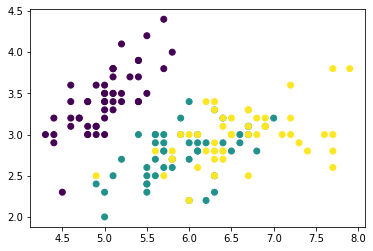

In [14]:
plt.scatter(df_practice[['sepal_length']].collect(), df_practice[['sepal_width']].collect(), c=df_practice[['variety_num']].collect())

## Выведите по аналогии график petal_length и petal_width, так же раскрашенный по типам цветков

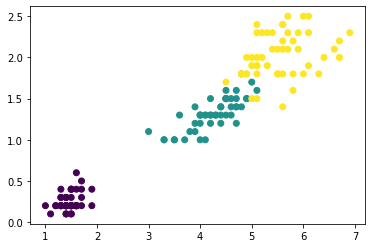

In [15]:
plt.scatter(df_practice[['petal_length']].collect(), df_practice[['petal_width']].collect(), c=df_practice[['variety_num']].collect())

## Посмотрите внимательно на получившийся график и сформируйте правило вида ЕСЛИ ЗНАЧЕНИЕ ПАРАМЕТРА A < ЗНАЧЕНИЕ, ТО IRIS ОТНОСИТСЯ К КЛАССУ SETOSA - ИНАЧЕ К КАКОМУ-ТО ДРУГОМУ (НАЗОВЕМ, ЕГО НАПРИМЕР UNKNOWN)
## При помощи команд withColumn, when, otherwise создайте в датафрейме новую колонку с таким предсказанием

In [16]:
from pyspark.sql.functions import when
from pyspark.sql.functions import col

In [17]:
df_setosa = df_practice.withColumn('prediction', when(col("petal_width") < 2, "Setosa").otherwise("unknown"))
df_setosa.show(5)

+------------+-----------+------------+-----------+-------+-----------+----------+
|sepal_length|sepal_width|petal_length|petal_width|variety|variety_num|prediction|
+------------+-----------+------------+-----------+-------+-----------+----------+
|         5.1|        3.5|         1.4|        0.2| Setosa|          0|    Setosa|
|         4.9|        3.0|         1.4|        0.2| Setosa|          0|    Setosa|
|         4.7|        3.2|         1.3|        0.2| Setosa|          0|    Setosa|
|         4.6|        3.1|         1.5|        0.2| Setosa|          0|    Setosa|
|         5.0|        3.6|         1.4|        0.2| Setosa|          0|    Setosa|
+------------+-----------+------------+-----------+-------+-----------+----------+
only showing top 5 rows



## Проверьте качество своего предсказания
Для этого:
1. Подсчитайте количество строк, где Вы предсказали класс Setosa и правильный класс был так же Setosa
2. Подсчитайте количество строк, где Вы предскзали класс Setosa, а правильный класс был какой-то другой (воспользуйтесь оператором "не равно" - !=)

In [21]:
df_filter = df_setosa.where((df_setosa['variety'] == df_setosa['prediction']))
df_filter.count()

50

In [35]:
df_filter1 = df_filter.where((df_filter['variety'] != 'Setosa') & (df_filter['prediction'] == 'Setosa'))
df_filter1.count()

0